# Python advanced course - HW in ML
## Tomer Antman

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
# Transform the non numeric values to numeric:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df
numeric_heart_data = handle_non_numerical_data(heart_data)
numeric_heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,1,0.0,2,0
1,49,1,3,160,180,0,0,156,1,1.0,0,1
2,37,0,1,130,283,0,2,98,1,0.0,2,0
3,48,1,2,138,214,0,0,108,0,1.5,0,1
4,54,0,3,150,195,0,0,122,1,0.0,2,0


The fit of the linear model is 0.51


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


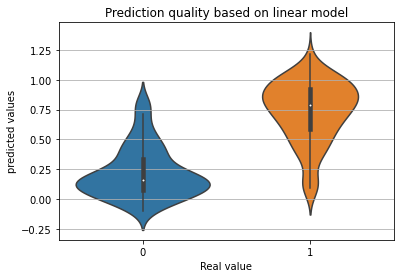

In [57]:
y = numeric_heart_data["HeartDisease"].to_numpy()
X = numeric_heart_data.drop(columns=["HeartDisease"])
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)
prediction = LinearRegression().fit(X_train,y_train)

print(f'The fit of the linear model is {round(100*prediction.score(X_test, y_test))/100}')
# create a data frame with the predictions
df = pd.DataFrame(
    {
        "prediction": prediction.predict(X_test),
        "reality": y_test
    }
)

fig, axes = plt.subplots()

sns.violinplot('reality','prediction', data=df, ax = axes)
axes.set_title('Prediction quality based on linear model')


axes.yaxis.grid(True)
axes.set_xlabel('Real value')
axes.set_ylabel("predicted values")

plt.show()
